텐서플로가 제공하는 데이터셋 확인

MNIST 필기 숫자 데이터셋

CIFAR-10 자연 영상 데이터셋

In [2]:
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
plt.figure(figsize=(24,3))
plt.suptitle('MNIST', fontsize=30)

Text(0.5, 0.98, 'MNIST')

<Figure size 2400x300 with 0 Axes>

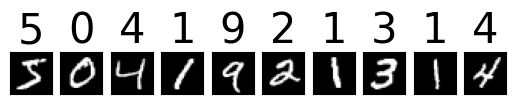

In [5]:
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.xticks([]);
  plt.yticks([])
  plt.title(str(y_train[i]), fontsize=30)

In [6]:
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [7]:
class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

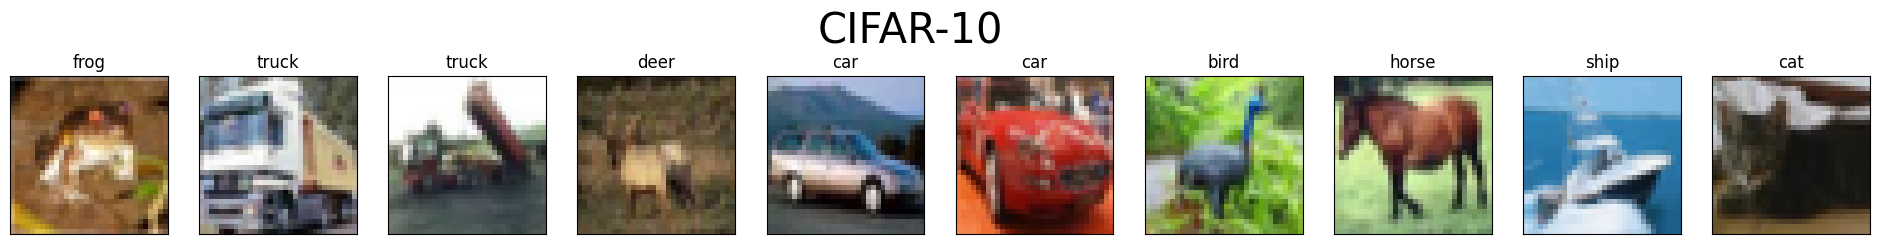

In [8]:
plt.figure(figsize=(24,3))
plt.suptitle('CIFAR-10', fontsize=30)
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(x_train[i])
  plt.xticks([]);
  plt.yticks([])
  plt.title(class_names[y_train[i,0]], fontsize=12)

필기 숫자 인식

다층 퍼셉트론으로 MNIST 인식하기(SGD 옵티마이저)

In [9]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [10]:
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()

In [11]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [12]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
mlp = Sequential()
mlp.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp.add(Dense(units=10, activation='softmax'))

In [14]:
mlp.compile(loss='MSE', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
mlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)

Epoch 1/50
469/469 - 6s - loss: 0.0879 - accuracy: 0.1806 - val_loss: 0.0849 - val_accuracy: 0.2919 - 6s/epoch - 12ms/step
Epoch 2/50
469/469 - 5s - loss: 0.0813 - accuracy: 0.4351 - val_loss: 0.0772 - val_accuracy: 0.5406 - 5s/epoch - 11ms/step
Epoch 3/50
469/469 - 4s - loss: 0.0730 - accuracy: 0.5715 - val_loss: 0.0684 - val_accuracy: 0.6067 - 4s/epoch - 9ms/step
Epoch 4/50
469/469 - 4s - loss: 0.0648 - accuracy: 0.6248 - val_loss: 0.0607 - val_accuracy: 0.6622 - 4s/epoch - 8ms/step
Epoch 5/50
469/469 - 7s - loss: 0.0581 - accuracy: 0.6759 - val_loss: 0.0545 - val_accuracy: 0.7123 - 7s/epoch - 15ms/step
Epoch 6/50
469/469 - 6s - loss: 0.0526 - accuracy: 0.7124 - val_loss: 0.0494 - val_accuracy: 0.7401 - 6s/epoch - 13ms/step
Epoch 7/50
469/469 - 8s - loss: 0.0482 - accuracy: 0.7352 - val_loss: 0.0455 - val_accuracy: 0.7561 - 8s/epoch - 16ms/step
Epoch 8/50
469/469 - 7s - loss: 0.0448 - accuracy: 0.7515 - val_loss: 0.0423 - val_accuracy: 0.7685 - 7s/epoch - 14ms/step
Epoch 9/50
469/469

In [15]:
res = mlp.evaluate(x_test, y_test, verbose=0)
print('정확률=', res[1]*100)

정확률= 89.64999914169312


Adam 옵티마이저를 사용하여 성능 향상

In [16]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [18]:
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()

In [19]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [20]:
mlp = Sequential()
mlp.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp.add(Dense(units=10, activation='softmax'))

In [21]:
mlp.compile(loss='MSE', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
mlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)

Epoch 1/50
469/469 - 7s - loss: 0.0150 - accuracy: 0.9005 - val_loss: 0.0103 - val_accuracy: 0.9334 - 7s/epoch - 15ms/step
Epoch 2/50
469/469 - 6s - loss: 0.0088 - accuracy: 0.9432 - val_loss: 0.0073 - val_accuracy: 0.9527 - 6s/epoch - 13ms/step
Epoch 3/50
469/469 - 7s - loss: 0.0065 - accuracy: 0.9587 - val_loss: 0.0063 - val_accuracy: 0.9600 - 7s/epoch - 16ms/step
Epoch 4/50
469/469 - 6s - loss: 0.0050 - accuracy: 0.9687 - val_loss: 0.0052 - val_accuracy: 0.9670 - 6s/epoch - 13ms/step
Epoch 5/50
469/469 - 6s - loss: 0.0040 - accuracy: 0.9751 - val_loss: 0.0050 - val_accuracy: 0.9682 - 6s/epoch - 14ms/step
Epoch 6/50
469/469 - 5s - loss: 0.0033 - accuracy: 0.9805 - val_loss: 0.0044 - val_accuracy: 0.9711 - 5s/epoch - 11ms/step
Epoch 7/50
469/469 - 6s - loss: 0.0028 - accuracy: 0.9833 - val_loss: 0.0038 - val_accuracy: 0.9752 - 6s/epoch - 12ms/step
Epoch 8/50
469/469 - 6s - loss: 0.0023 - accuracy: 0.9863 - val_loss: 0.0039 - val_accuracy: 0.9746 - 6s/epoch - 12ms/step
Epoch 9/50
469/4